<a href="https://colab.research.google.com/github/taranaalex/MLPNS_ATarana/blob/main/neuralNetwork_inClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl

In [2]:
X = np.array(
    [[0,0,1],
     [1,1,1],
     [1,0,1],
     [0,1,1]])

(-0.5, 2.5, 3.5, -0.5)

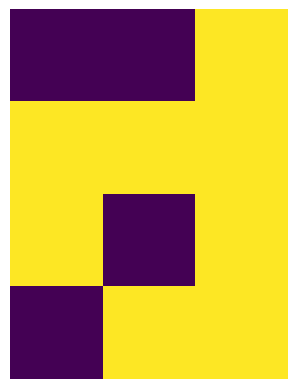

In [3]:
pl.imshow(X);
pl.axis('off')

In [4]:
y = np.array([[0,1,1,0]]).T

In [5]:
y

array([[0],
       [1],
       [1],
       [0]])

# basic architecture: 1 layer (perceptron)
4 osservazioni

3 neuroni

1 layer

In [6]:
def sigmoid(x):
  return 1. / (1.+ np.exp(-x))

In [7]:
def dsigmoid(x):
  return x * (1. - x)

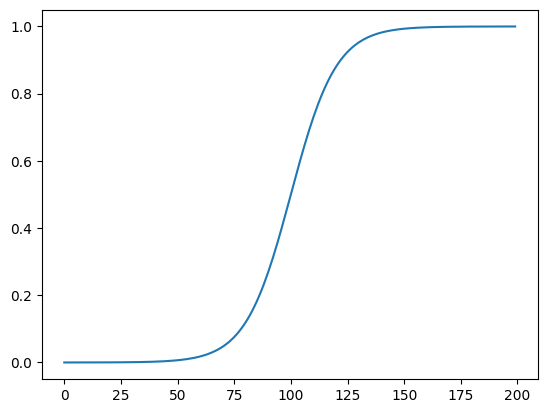

In [8]:
pl.plot(sigmoid(np.arange(-10,10,0.1)));

In [9]:
def loss(prediction, target):
  return target - prediction

# Neural network

In [10]:
training = 6000 # numero di 'epoche'

In [11]:
# layer of synopses / neurons
# 4 x 3 dot 3 x 1
np.random.seed(302)
loss_output = []
# genero un vettore 3x1 di numeri random tra -1 e 1
syn0 = 2 * np.random.random((3, 1)) - 1

for iter in range(training):
  inputLayer = X

  # forward propagation
  # linear regression (dot product linear algebra solution)
  l1 = np.dot(inputLayer, syn0)
  # activations
  output = sigmoid(l1)
  #calculate error
  output_error = loss(output, y)
  loss_output.append(np.abs(output_error).sum())

  # backward propagation
  # calculate correction
  output_delta = output_error * dsigmoid(output)
  # apply correction to weights
  syn0 += np.dot(inputLayer.T, output_delta) # backpropagation: correzione sui pesi

print('output after training\n', output)
print('output target\n', y)

output after training
 [[0.01254551]
 [0.98977455]
 [0.99169035]
 [0.0101995 ]]
output target
 [[0]
 [1]
 [1]
 [0]]


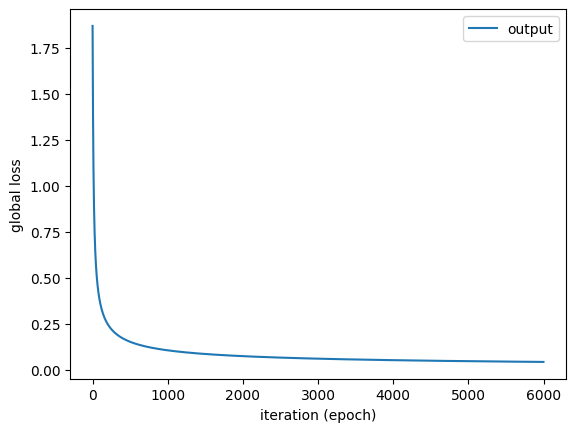

In [15]:
pl.plot(loss_output, label='output');
pl.legend();
pl.xlabel('iteration (epoch)');
pl.ylabel('global loss');

# Multi-layer

In [18]:
np.random.seed(302)

syn0 = 2*np.random.random((3,5))-1
syn1 = 2*np.random.random((5,1))-1

loss_output = []
loss_hidden = []

for iter in range(training):
  inputLayer = X

  # forward propagation

  # primo layer
  l1 = np.dot(inputLayer, syn0)
  hidden = sigmoid(l1)
  hidden_error = loss(hidden, y)

  # secondo layer
  l2 = np.dot(l1, syn1)
  output = sigmoid(l2)

  # calcolo errore
  output_error = loss(output, y)
  loss_hidden.append(np.abs(hidden_error).sum())
  loss_output.append(np.abs(output_error).sum())

  # backward propagation

  # calcolo correzione
  output_delta = output_error * dsigmoid(output)
  hidden_delta = hidden_error * dsigmoid(hidden)

  # correzioni ai pesi
  syn0 += np.dot(inputLayer.T, hidden_delta)
  syn1 += np.dot(hidden.T, output_delta)

print('output after training\n', output)
print('output target\n', y)

output after training
 [[2.17470255e-04]
 [9.99854202e-01]
 [9.99902878e-01]
 [1.44869827e-04]]
output target
 [[0]
 [1]
 [1]
 [0]]


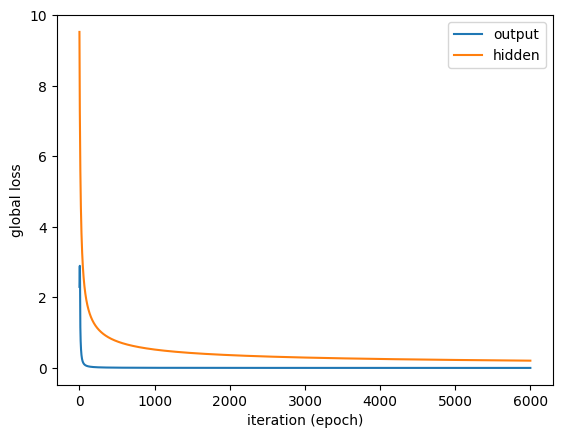

In [19]:
pl.plot(loss_output,label='output');
pl.plot(loss_hidden,label='hidden');
pl.legend();
pl.xlabel('iteration (epoch)');
pl.ylabel('global loss');